## Malaria Detection
- https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [1]:
DATA_DIR = 'data/cell_images/'
SIZE    = 64

In [3]:
import os
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')

In [4]:
parasitized_images[0]

'C48P9thinF_IMG_20150721_160406_cell_247.png'

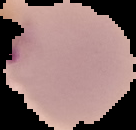

In [5]:
from PIL import Image
Image.open(DATA_DIR + 'Parasitized/' + parasitized_images[0])

In [13]:
import cv2
image = cv2.imread(DATA_DIR + 'Parasitized/' + parasitized_images[0])
image.shape

(130, 136, 3)

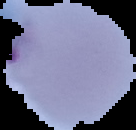

In [14]:
from PIL import Image
image = Image.fromarray(image, 'RGB')
image

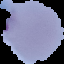

In [15]:
image = image.resize((SIZE, SIZE))
image

In [16]:
import numpy as np
a = np.array(image)
a.shape

(64, 64, 3)

In [17]:
dataset = []
label   = []

In [18]:
for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [20]:
len(dataset)

500

In [21]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')

In [22]:
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

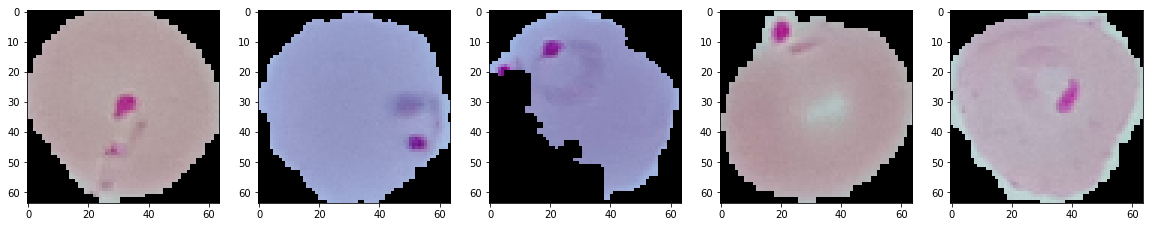

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

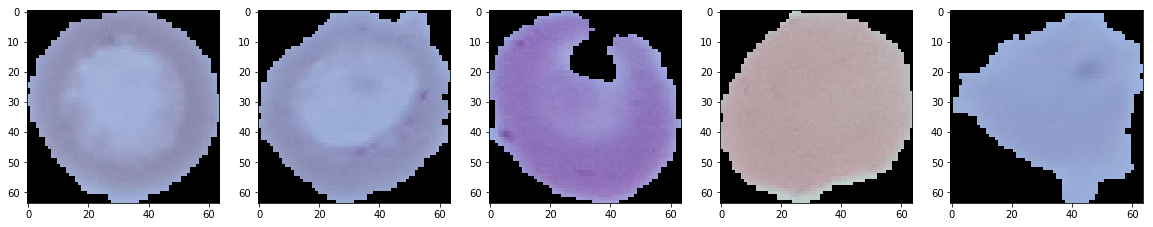

In [27]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

## 使用Keras 建立卷積神經網路

In [28]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [31]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), 
                input_shape = (SIZE, SIZE, 3), 
                activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
               
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
               

In [32]:
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'sigmoid', units=2))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [33]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])
print(classifier.summary())


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0      

In [35]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [37]:
len(X_train)

800

In [38]:
len(X_test)

200

In [41]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10, 
                         validation_split = 0.1,
                         shuffle = False)

Train on 720 samples, validate on 80 samples
Epoch 1/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0130 - acc: 0.9889 - val_loss: 1.3350 - val_acc: 0.6750
Epoch 2/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0111 - acc: 0.9917 - val_loss: 1.5972 - val_acc: 0.6375
Epoch 3/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0116 - acc: 0.9889 - val_loss: 0.7779 - val_acc: 0.8125
Epoch 4/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0083 - acc: 0.9931 - val_loss: 0.7269 - val_acc: 0.8250
Epoch 5/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0101 - acc: 0.9917 - val_loss: 1.1034 - val_acc: 0.7375
Epoch 6/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0093 - acc: 0.9917 - val_loss: 0.9217 - val_acc: 0.7500
Epoch 7/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0070 - acc: 0.9944 - val_loss: 0.9413 - val_acc: 0.7750
Epoch 8/10
720/720 [===========

In [46]:
predicted = classifier.predict(np.array(X_test)).argmax(axis = 1)

In [50]:
res = y_test.argmax(axis = 1)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(res,predicted)

0.825

In [52]:
confusion_matrix(res, predicted)

array([[97,  1],
       [34, 68]])

## Data Augmentation

In [53]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255, # 把像素標準化為0~1範圍
                                     zoom_range = 0.3, # 把圖片縮放
                                     horizontal_flip = True, # 把圖片水平翻轉
                                     rotation_range = 30) #將圖旋轉

test_generator = ImageDataGenerator(rescale = 1/255)

In [54]:
train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

In [55]:
test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [64]:
?classifier.fit_generator

In [67]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 10,
                                   validation_data=(np.array(X_test),y_test),
                                   shuffle = False)

Epoch 1/10
13/12 [===============================] - 3s 267ms/step - loss: 0.1047 - acc: 0.9482 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 2/10
13/12 [===============================] - 3s 261ms/step - loss: 0.0959 - acc: 0.9483 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 3/10
13/12 [===============================] - 3s 254ms/step - loss: 0.0908 - acc: 0.9567 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 4/10
13/12 [===============================] - 3s 253ms/step - loss: 0.1018 - acc: 0.9495 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 5/10
13/12 [===============================] - 3s 267ms/step - loss: 0.0970 - acc: 0.9471 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 6/10
13/12 [===============================] - 3s 263ms/step - loss: 0.0878 - acc: 0.9507 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 7/10
13/12 [===============================] - 3s 252ms/step - loss: 0.0976 - acc: 0.9506 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 8/10
13/12 [===============================] - 4s 278ms/step - 

In [62]:
classifier.predict(np.array(X_test)).argmax(axis = 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])